# Fetching data about COVID-19

This notebook is a preamble to one that's about modelling the rate of growth of coronavirus cases on a country-by-country basis.

In [1]:
# Import all the standard things
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Also some extra things useful here
from datetime import datetime, date

## Hoover and preprocess the data

Researchers at the Center for Systems Science and Engineering ([CSSE](https://systems.jhu.edu)) at Johns Hopkins Univeristy are maintaining a [dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) that lists reported infections, deaths and recoveries, worldwide. The underlying data, in CSV format, broken down by country (or smaller unit), is available from [GitHub](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data).

In [2]:
# See https://stackoverflow.com/questions/16283799/how-to-read-a-csv-file-from-a-url-with-python#16283926
csvURL = ("https://github.com/CSSEGISandData/COVID-19/" +
          "raw/master/csse_covid_19_data/csse_covid_19_time_series/" +
          "time_series_covid19_confirmed_global.csv"
)

rawData = pd.read_csv(csvURL)
rawData.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178373,178387,178418,178457,178513,178574,178611,178638,178648,178689
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274429,274462,274504,274520,274535,274606,274606,274737,274791,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265738,265739,265739,265741,265746,265746,265754,265761,265761,265767
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,40709,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99194,99287,99287,99287,99287,99287,99287
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7535,7535,7539,7539,7539,7567,7567,7571,7571,7571
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9059944,9060495,9060923,9060923,9060923,9060923,9060923,9060923,9060923,9060923
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422729,422747,422762,422770,422784,422799,422805,422814,422822,422825
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,92330,92330,93713,94486,95625,96854,97825,98760,99485,99485


#### Group by country and sum

Here we sum together all the rows for a given country. This can have unexpected consequences in that, for example, the total for the UK will include not only England, Scotland, Wales and Northern Ireland, but also the Bahamas.

In [3]:
# Aggregate by country
dataByCountry = rawData.groupby(['Country/Region']).sum()

# Drop the Latityude and Longitude, which will have been messed-up by summing.
del dataByCountry['Lat']
del dataByCountry['Long']

# Look at the results
dataByCountry.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,178373,178387,178418,178457,178513,178574,178611,178638,178648,178689
Albania,0,0,0,0,0,0,0,0,0,0,...,274429,274462,274504,274520,274535,274606,274606,274737,274791,274828
Algeria,0,0,0,0,0,0,0,0,0,0,...,265738,265739,265739,265741,265746,265746,265754,265761,265761,265767
Andorra,0,0,0,0,0,0,0,0,0,0,...,40709,40709,40709,40709,40709,41013,41013,41013,41013,41013
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99287,99287,99287,99287,99287,99287
Antarctica,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,7535,7535,7539,7539,7539,7567,7567,7571,7571,7571
Argentina,0,0,0,0,0,0,0,0,0,0,...,9059944,9060495,9060923,9060923,9060923,9060923,9060923,9060923,9060923,9060923
Armenia,0,0,0,0,0,0,0,0,0,0,...,422729,422747,422762,422770,422784,422799,422805,422814,422822,422825


#### Order the rows by total number of cases on the most recent date

In [4]:
colNames = dataByCountry.columns.values
lastColName = colNames[-1]
dataByCountry.sort_values( by=[lastColName], ascending=False, inplace=True)
dataByCountry.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,80613695,80626134,80633315,80686311,80732932,80801713,80850913,80952268,80971930,80984914
India,0,0,0,0,0,0,0,0,1,1,...,43040947,43042097,43044280,43045527,43047594,43049974,43052425,43054952,43057545,43060086
Brazil,0,0,0,0,0,0,0,0,0,0,...,30247302,30250077,30252618,30261088,30275219,30311969,30330629,30338697,30345808,30349463
France,0,0,2,3,3,3,4,5,5,5,...,27762686,27874269,27960919,27980729,28006219,28162002,28266009,28354529,28435100,28494054
Germany,0,0,0,0,0,1,4,4,4,5,...,23376879,23416663,23437145,23459628,23658211,23844536,24006254,24141333,24180512,24200596
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,21916961,21916961,21916961,21916961,22033383,22060704,22082374,22106306,22106306,22106306
Russia,0,0,0,0,0,0,0,0,0,2,...,17790211,17801103,17811199,17820486,17829009,17838087,17846818,17855661,17864332,17872625
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,16212751,16305752,16353495,16471940,16583220,16674045,16755055,16830469,16895194,16929564
Italy,0,0,0,0,0,0,0,0,0,2,...,15595302,15659835,15712088,15730676,15758002,15858442,15934437,16008181,16079209,16136057


#### Plot the raw data

It's clear that the epidemic starts on different days in different places.

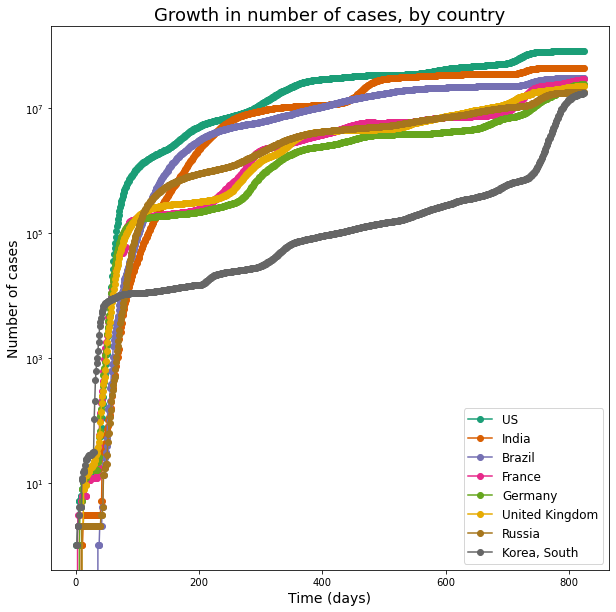

In [5]:
# Get my favourite colour scheme
darkCmap = plt.get_cmap( name='Dark2' )
darkColors = darkCmap.colors

# Start the plot
plt.figure(figsize=[10,10])

# Plot growth curves
nCountries = dataByCountry.shape[0]
nDates = dataByCountry.shape[1] 
tVals = np.linspace( 1, nDates, num=nDates )

nToPlot = len(darkColors)
for j in range(nToPlot):
    crntCountryName = dataByCountry.index.values[j] # name of current country
    nVals = dataByCountry.iloc[j,:].to_numpy() # time series of number of cases for j-th country
    plt.plot( tVals, nVals, color=darkColors[j], marker="o", linestyle="-", label=crntCountryName )
    j = j + 1 
 
plt.yscale('log')
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Number of cases', fontsize=14)
plt.title('Growth in number of cases, by country', fontsize=18)
plt.legend( fontsize=12 )
plt.show()

## Plot standardised growth curves 

We'd like to see whether the growth in cases is broadly comparable from country to country, so here we shift all the curves leftward, so that $N(0) \approx 100$. 

#### Get an ordinal date for each column

It'll prove convenient to have a time measured in days since 1 Jan 2020 associated with each of the dates labelling the columns. As is often the way, manipulating dates is fiddly. There's probably a *much* easier way to do this.

In [6]:
# Wrestle the strings labelling the columns into an array of integers with one column each for year, month and day
mdyColDates = np.array( colNames, dtype='unicode' ) # In the format of 1/22/20. That is, m/d/y
mdyColDateParts = np.char.split( mdyColDates, sep='/' ) # m/d/y -> [m, d, y]
mdyColDateParts = np.array( mdyColDateParts.tolist() ) # Array of lists -> array with 3 columns

ymdColDateParts = np.column_stack( (mdyColDateParts[:,2], mdyColDateParts[:,0], mdyColDateParts[:,1]) ) # reorders columns to y, m, d
ymdColDateNums = ymdColDateParts.astype( np.uint ) # strings -> unsigned ints
ymdColDateNums[:,0] = ymdColDateNums[:,0] + 2000 # standardise year: 20 -> 2020

In [7]:
# Finally, turn the array of numbers into an array of numpy datetime64 objects
nDates = ymdColDateNums.shape[0]
datetimeColDates = np.empty( nDates, dtype='object' ) 
for j in range(nDates):
    ymd = ymdColDateNums[j,:] # a convenient nickname
    stdDateStr = "{year:04}-{month:02}-{day:02}".format( year=ymd[0], month=ymd[1], day=ymd[2] ) # Standardised date: 1/25/20 -> 2020-01-25
    datetimeColDates[j] = np.datetime64( stdDateStr )
    
# Get ordinal dates
originDatetime = np.datetime64( '2019-12-31' ) # First of January will be day 1.
ordinalColDates = np.zeros( nDates )
for j in range(nDates):
    delta = datetimeColDates[j] - originDatetime
    ordinalColDates[j] = delta / np.timedelta64( 1, 'D' )


#### Plot shifted curves

Here we standardise the growth curves by shifting them so the left, to that $t=0$ is the day on which the country first reported 100 or more cases.

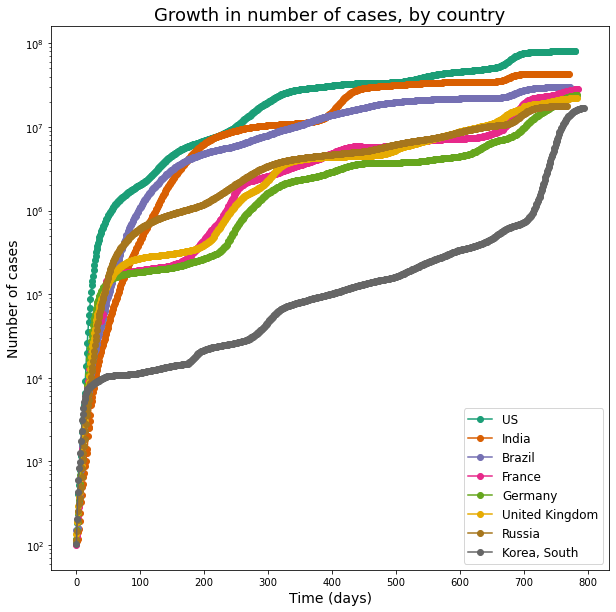

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/GrowthCurves.pdf'

In [8]:
# Set a threshold
nCasesForDayZero = 100

# Start the plot
shiftedGrowthFig = plt.figure(figsize=[10,10])

# Plot growth curves
nCountries = dataByCountry.shape[0]
nToPlot = len(darkColors)
nPlotted = 0

j = 0 # runs over countries
while (nPlotted < nToPlot) and (j < nCountries):
    crntCountryName = dataByCountry.index.values[j] # name of current country
    nCases = dataByCountry.iloc[j,:].to_numpy() # time series of number of cases for j-th country
    if (nCases[0] < nCasesForDayZero) and (nCases[-1] > nCasesForDayZero):
        # Find the first day to include
        firstIdx = np.min( np.nonzero(nCases >= nCasesForDayZero) )
        
        # Plot the data
        tVals = ordinalColDates[firstIdx:] - ordinalColDates[firstIdx]
        nVals = nCases[firstIdx:]
        plt.plot( tVals, nVals, color=darkColors[nPlotted], marker="o", linestyle="-", label=crntCountryName )
        nPlotted = nPlotted + 1
    
    # Move on to the next country
    j = j + 1

plt.yscale('log')
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Number of cases', fontsize=14)
plt.title('Growth in number of cases, by country', fontsize=18)
plt.legend( fontsize=12 )
plt.show()

shiftedGrowthFig.savefig('Figures/GrowthCurves.pdf')

Many of the curves seem to rolling off, suggesting that public health measures eventually slowed the spread of the pandemic, but the early growth seems fairly consistent.

#### Prepare a data frame of the shifted curves and write it to a file

Assemble a data frame that records the numbers of cases from the first month after caseload exceeded 100 cases.

In [9]:
# Decide how much data we want
nDaysToSave = 30 

# Survey the data frame to determine which rows hold 
# data where the caseload grows monotonically
firstDayColNum = np.zeros( nCountries, dtype=np.uint16 )
shouldSaveQ = np.full( nCountries, False, dtype=bool )

for j in range(nCountries):
    nCases = dataByCountry.iloc[j,:].to_numpy() # time series of number of cases for j-th country
    if (nCases[0] < nCasesForDayZero) and (nCases[-1] > nCasesForDayZero):
        # Find the first day and last days to include
        firstDayColNum[j] = np.min( np.nonzero(nCases >= nCasesForDayZero) )
        
        # Keep only those data sets where the caseload grows daily for the nDaysToSave days
        initialPeriod = nCases[firstDayColNum[j]:(firstDayColNum[j] + nDaysToSave)]
        if( nDaysToSave <= len(initialPeriod) ):
            dailyIncrease = initialPeriod[1:nDaysToSave] - initialPeriod[0:(nDaysToSave-1)]
            shouldSaveQ[j] = np.all( dailyIncrease > 0 )
    
# Build a data frame that includes only the countries with sufficient data
# and, for those coountries, only the first month of data after
# caseloads reached 100 cases.
countriesToSave = dataByCountry.index.values[shouldSaveQ]
nCountriesToSave = len(countriesToSave)

dataMat = np.zeros((nCountriesToSave, nDaysToSave))
firstDayColNum = firstDayColNum[shouldSaveQ] # So that firstDayColNum[j] and dataMat[j,:] refer to the same data 
for j in range(nCountriesToSave):
    crntCountry = countriesToSave[j]
    crntFirstCol = firstDayColNum[j]
    
    nCases = dataByCountry.loc[crntCountry].to_numpy()
    dataMat[j,:] = nCases[crntFirstCol:(crntFirstCol + nDaysToSave)]
    
dataToSave = pd.DataFrame( dataMat )
dataToSave['Country'] = countriesToSave
dataToSave.set_index('Country', inplace=True )
dataToSave.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Country,,,,,,,,,,,,,,,,,,,,,
US,107.0,184.0,237.0,403.0,519.0,594.0,782.0,1147.0,1586.0,2219.0,...,56714.0,68841.0,86662.0,105253.0,127417.0,143544.0,165698.0,192079.0,223254.0,255530.0
India,102.0,113.0,119.0,142.0,156.0,194.0,244.0,330.0,396.0,499.0,...,2567.0,3082.0,3588.0,4778.0,5311.0,5916.0,6725.0,7598.0,8446.0,9205.0
Germany,117.0,150.0,188.0,240.0,349.0,534.0,684.0,847.0,1112.0,1296.0,...,16662.0,18610.0,22672.0,27436.0,31554.0,36508.0,42288.0,48582.0,52547.0,57298.0
United Kingdom,134.0,189.0,246.0,295.0,374.0,429.0,483.0,630.0,888.0,1299.0,...,10398.0,12747.0,15139.0,17847.0,20958.0,24203.0,27055.0,29949.0,34251.0,38788.0
Russia,114.0,147.0,199.0,253.0,306.0,367.0,438.0,495.0,658.0,840.0,...,6343.0,7497.0,8672.0,10131.0,11917.0,13584.0,15770.0,18328.0,21102.0,24490.0
"Korea, South",104.0,204.0,433.0,602.0,833.0,977.0,1261.0,1766.0,2337.0,3150.0,...,7755.0,7869.0,7979.0,8086.0,8162.0,8236.0,8320.0,8413.0,8565.0,8652.0
Italy,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,2036.0,2502.0,...,21157.0,24747.0,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0
Turkey,192.0,359.0,670.0,1236.0,1529.0,1872.0,2433.0,3629.0,5698.0,7402.0,...,38226.0,42282.0,47029.0,52167.0,56956.0,61049.0,65111.0,69392.0,74193.0,78546.0
Netherlands,128.0,188.0,265.0,321.0,382.0,503.0,603.0,804.0,961.0,1138.0,...,7457.0,8640.0,9806.0,10923.0,11814.0,12662.0,13686.0,14779.0,15814.0,16725.0


Write that puppy to a CSV file.

In [10]:
dataToSave.to_csv( "CaseCountAtOnset.csv")